In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


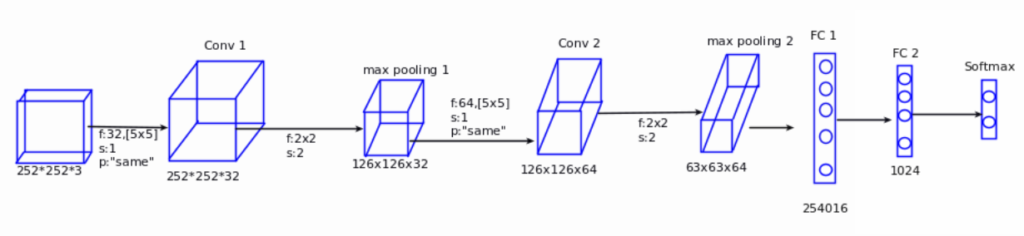

In [2]:
from IPython.display import Image
Image('LeNet5.png')

In [ ]:
#252x252x3 input image that is the first layer uses a 32,5x5 filter stride of 1 and same padding.
#Next, apply max pooling of parameter, filter 2x2 and strides=2.This should reduce 
#the height and width of the representation by a factor of 2. 
#so 252x252x32 now become 126x126x32.The number of channels remains the same. we are going
#to call this max pooling 1.
#Next given 126x126x32 volume and apply another convolution layer to it.Use a filter size 
#this 5×5 and stride 1 and 64 filters this time. So now you end up with a 126x126x64 volume
#called conv2.
#Then in this network do max pooling with a Filter:2×2 and Strides:2 and the 126X126X64 
#this will the half the height and width(63X63X64).
#Dense Layer
#Next, we want to add a dense layer (with 1,024 neurons and ReLU activation) to our 
#CNN to perform classification on the features extracted by the convolution/pooling layers.
#Before we connect the layer, we’ll flatten our feature map (max pooling 2) to 
#shape [batch_size, features], so that our tensor has only two dimensions:
#63x63x64=254016 so let’s now fatten output to a 254016x1 dimensional vector we also
#think of this a flattened result into just a set of neurons.
#Logits Layer
#You have 1024 real numbers that you can feed to a softmax unit. If you’re 
#trying to do classifying images like either dog or cat then this would be a softmax with 
#2 outputs so this is a reasonably typical example of what a convolutional network looks like.

In [3]:
Image_Size               = 252
No_Of_Channels           = 3
No_Of_Classes            = 2
    
def cnn_model_fn(features, labels, mode):
# Input Layer
    input_layer = tf.reshape(features["image"], [-1, 252, 252, 3])
    
    
# Convolutional Layer #1
    conv1 = tf.layers.conv2d(inputs=input_layer,filters=32,kernel_size=[5, 5],
                             padding="same", activation=tf.nn.relu)
# Max Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    
# Convolutional Layer #2
    conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",
        activation=tf.nn.relu)
#Max Pooling Layer #2
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    
# Flatten Pooling 2 Layer
    pool2_flat = tf.reshape(pool2, [-1, 126 * 126 * 64])
    
#Fully Connected Layer1
    fc1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=fc1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    
# Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=2)
    